##Introduction
A bank manager has noticed that more and more of their customers are cancelling their credit cards with the bank.  It would be very helpful for the business if they could get some analysis on their customer data and a model on who is possibly going to cancel their cards in the future so they can reach out to the customer before they do so.

#Main Question
What are the main differences between the customers who cancelled their cards and the customers who did not

##Additional Questions
Are demographics or spending habits a better predictor of a customer who cancelled?

Is There a significant difference in mean avg utilization rates between the 2 different customers 

Do Exisiting customers have a significantly higher mean age than Canceled customers?

What is the average education level of Canceled Customers?

Do Existing Customers have a significantly higher mean income level than Canceled Customers?

Will recall or percision be more important in the machine learning models?



#Exploratory Analysis

##Import Libraries and read data

In [ ]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/insc486/BankChurners.csv')
df

CLIENTNUM  ... Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0      768805383  ...                                           0.999910                                                                                
1      818770008  ...                                           0.999940                                                                                
2      713982108  ...                                           0.999980                                                                                
3      769911858  ...                                           0.999870                                                                                
4      709106358  ...                                           0.999980                                                                                
...          ...  ...                                                ...                                                                                
10122  772366833  ...                                           0.999810                                                                                
10123  710638233  ...                                           0.004729                                                                                
10124  716506083  ...                                           0.002118                                                                                
10125  717406983  ...                                           0.003294                                                                                
10126  714337233  ...                                           0.003377                                                                                

[10127 rows x 23 columns]

##Drop last 2 columns and NAN's

In [ ]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
df = df.dropna(axis=0, how='any')
df

CLIENTNUM     Attrition_Flag  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
0      768805383  Existing Customer  ...                1.625                 0.061
1      818770008  Existing Customer  ...                3.714                 0.105
2      713982108  Existing Customer  ...                2.333                 0.000
3      769911858  Existing Customer  ...                2.333                 0.760
4      709106358  Existing Customer  ...                2.500                 0.000
...          ...                ...  ...                  ...                   ...
10122  772366833  Existing Customer  ...                0.857                 0.462
10123  710638233  Attrited Customer  ...                0.683                 0.511
10124  716506083  Attrited Customer  ...                0.818                 0.000
10125  717406983  Attrited Customer  ...                0.722                 0.000
10126  714337233  Attrited Customer  ...                0.649                 0.189

[10127 rows x 21 columns]

##Making seperate dataframes for existing and attrited customers

In [ ]:
existingcustomerdf = df[df['Attrition_Flag'] == 'Existing Customer']
attritedcustomerdf = df[df['Attrition_Flag'] == 'Attrited Customer']

##How many subjects are in the existing and attrited dataframes?

In [ ]:
x = existingcustomerdf['CLIENTNUM'].count()
y = attritedcustomerdf['CLIENTNUM'].count()
print(x, y)

8500 1627


There are 8500 existing customers and 1627 attrited customers, that is a pretty large imbalance

In [ ]:
existingcustomerdf.describe()

CLIENTNUM  Customer_Age  ...  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
count  8.500000e+03   8500.000000  ...          8500.000000            8500.000000
mean   7.399272e+08     46.262118  ...             0.742434               0.296412
std    3.710723e+07      8.081157  ...             0.228054               0.272568
min    7.080821e+08     26.000000  ...             0.028000               0.000000
25%    7.132197e+08     41.000000  ...             0.617000               0.055000
50%    7.181643e+08     46.000000  ...             0.721000               0.211000
75%    7.783415e+08     52.000000  ...             0.833000               0.529250
max    8.283431e+08     73.000000  ...             3.714000               0.994000

[8 rows x 15 columns]

In [ ]:
attritedcustomerdf.describe()

CLIENTNUM  Customer_Age  ...  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
count  1.627000e+03   1627.000000  ...          1627.000000            1627.000000
mean   7.352614e+08     46.659496  ...             0.554386               0.162475
std    3.557725e+07      7.665652  ...             0.226854               0.264458
min    7.080833e+08     26.000000  ...             0.000000               0.000000
25%    7.123713e+08     41.000000  ...             0.400000               0.000000
50%    7.165644e+08     47.000000  ...             0.531000               0.000000
75%    7.683737e+08     52.000000  ...             0.692000               0.231000
max    8.282949e+08     68.000000  ...             2.500000               0.999000

[8 rows x 15 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8579ae2710>]],
      dtype=object)

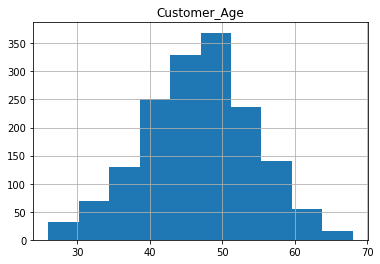

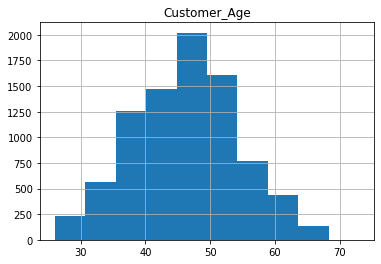

In [ ]:
attritedcustomerdf.hist(['Customer_Age'])
existingcustomerdf.hist(['Customer_Age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85795b0510>]],
      dtype=object)

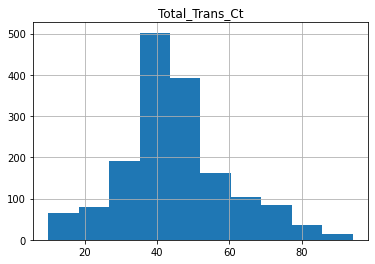

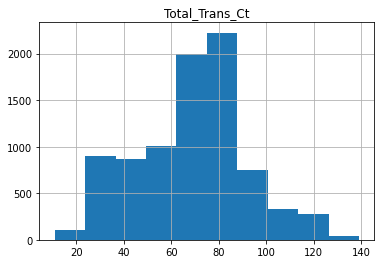

In [ ]:
attritedcustomerdf.hist(['Total_Trans_Ct'])
existingcustomerdf.hist(['Total_Trans_Ct'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8579484c10>]],
      dtype=object)

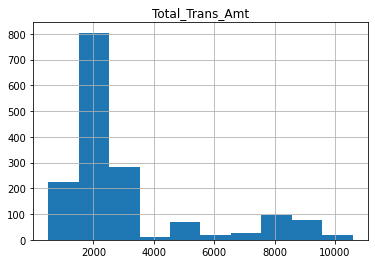

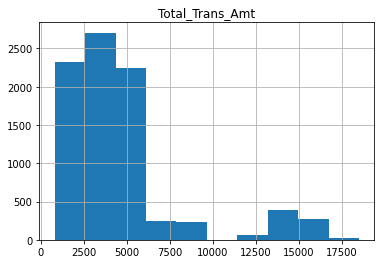

In [ ]:
attritedcustomerdf.hist(['Total_Trans_Amt'])
existingcustomerdf.hist(['Total_Trans_Amt'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe27d44f3d0>]],
      dtype=object)

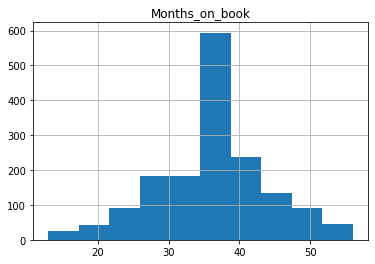

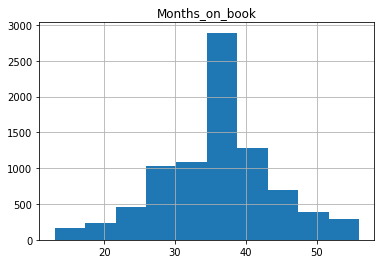

In [ ]:
attritedcustomerdf.hist(['Months_on_book'])
existingcustomerdf.hist(['Months_on_book'])


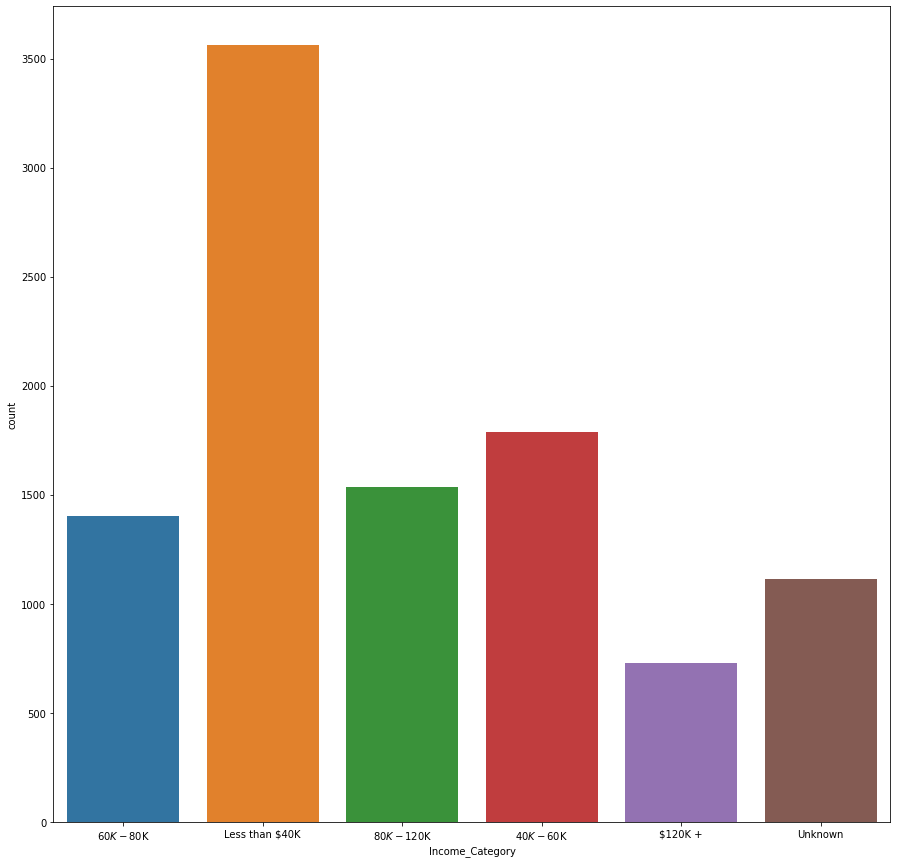

In [ ]:
plt.figure(figsize = (15,15))
sns.countplot(x = df['Income_Category'])

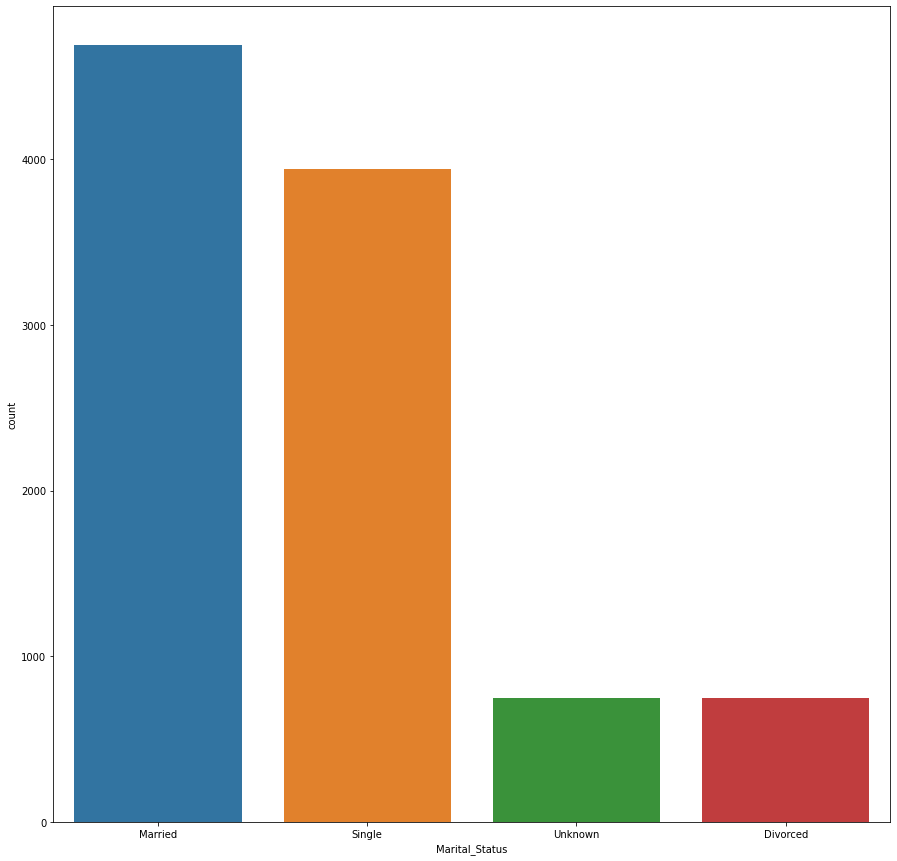

In [ ]:
plt.figure(figsize = (15,15))
sns.countplot(x = df['Marital_Status'])

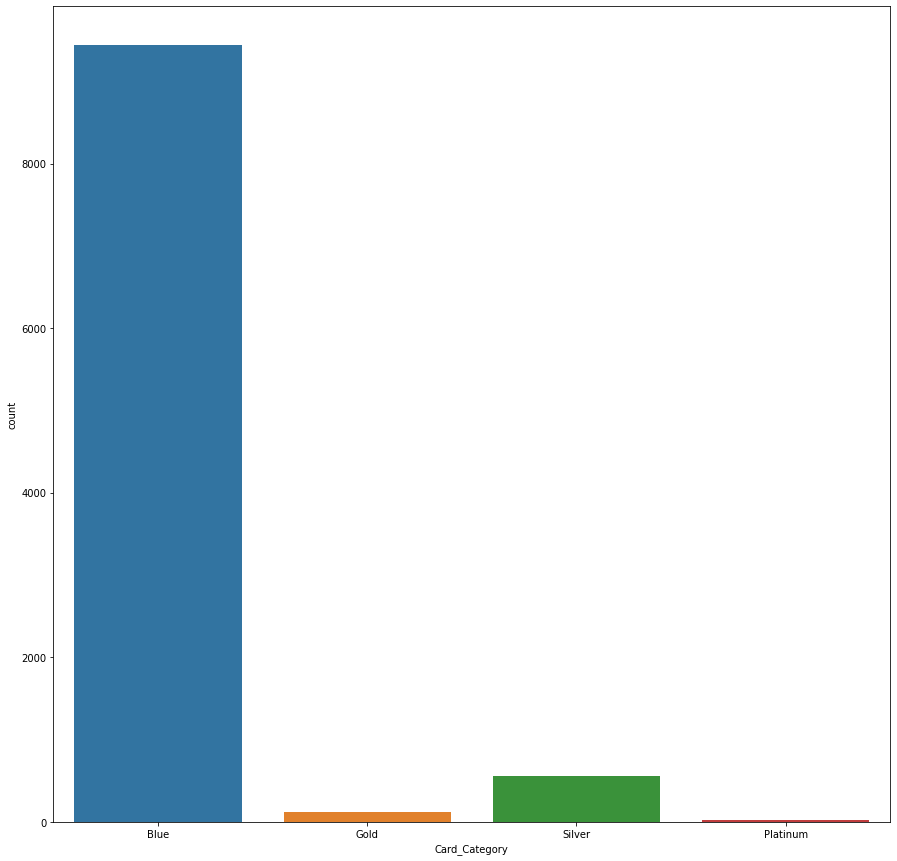

In [ ]:
plt.figure(figsize = (15,15))
sns.countplot(x = df['Card_Category'])

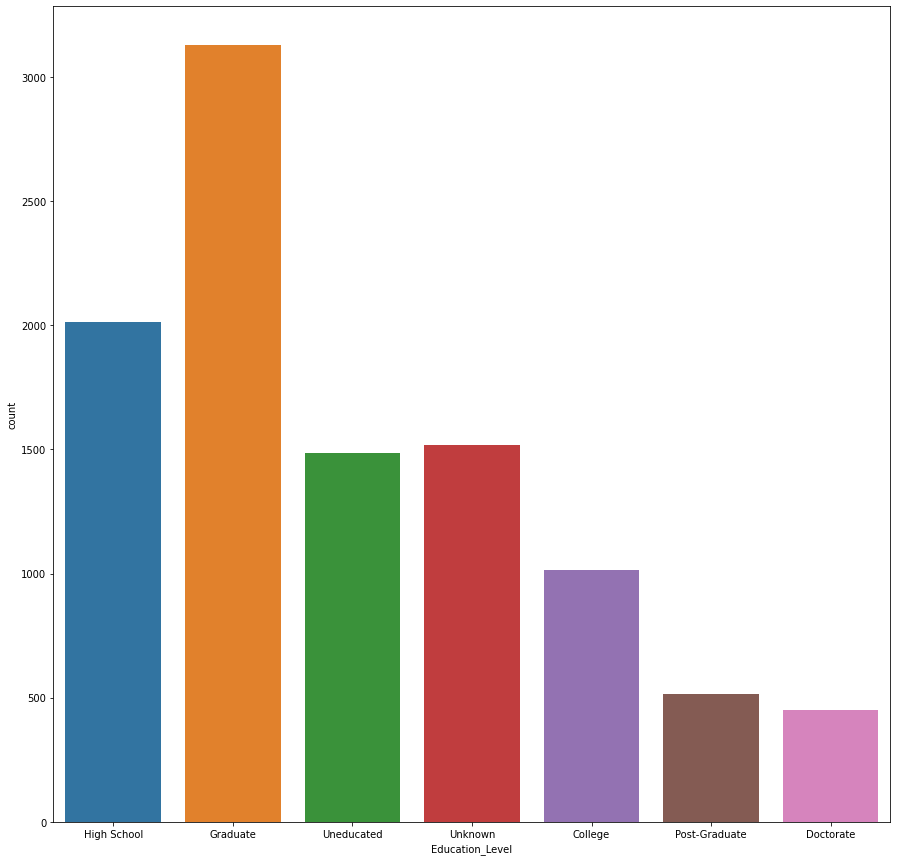

In [ ]:
plt.figure(figsize = (15,15))
sns.countplot(x = df['Education_Level'])

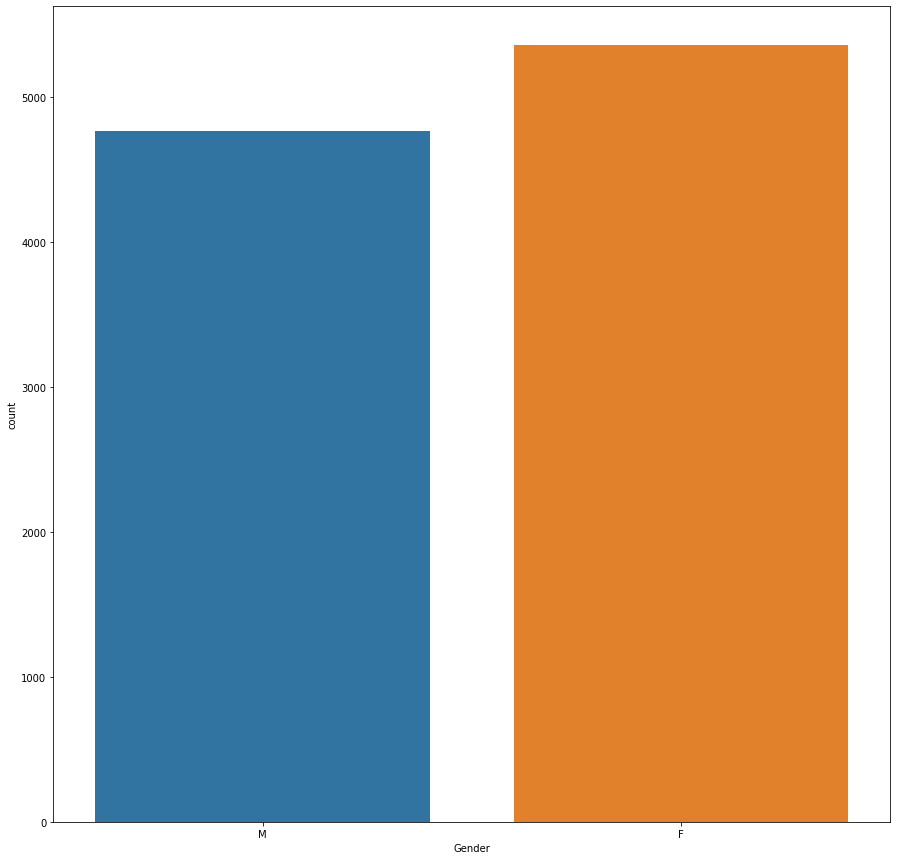

In [ ]:
plt.figure(figsize = (15,15))
sns.countplot(x = df['Gender'])

Gender is fairly even

In [ ]:
df.corr()

CLIENTNUM  ...  Avg_Utilization_Ratio
CLIENTNUM                  1.000000  ...               0.000266
Customer_Age               0.007613  ...               0.007114
Dependent_count            0.006772  ...              -0.037135
Months_on_book             0.134588  ...              -0.007541
Total_Relationship_Count   0.006907  ...               0.067663
Months_Inactive_12_mon     0.005729  ...              -0.007503
Contacts_Count_12_mon      0.005694  ...              -0.055471
Credit_Limit               0.005708  ...              -0.482965
Total_Revolving_Bal        0.000825  ...               0.624022
Avg_Open_To_Buy            0.005633  ...              -0.538808
Total_Amt_Chng_Q4_Q1       0.017369  ...               0.035235
Total_Trans_Amt           -0.019692  ...              -0.083034
Total_Trans_Ct            -0.002961  ...               0.002838
Total_Ct_Chng_Q4_Q1        0.007696  ...               0.074143
Avg_Utilization_Ratio      0.000266  ...               1.000000

[15 rows x 15 columns]

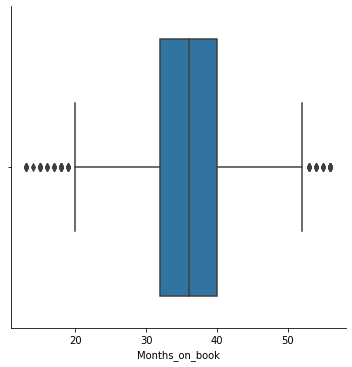

In [ ]:
sns.catplot(x='Months_on_book', kind= 'box', data=attritedcustomerdf)

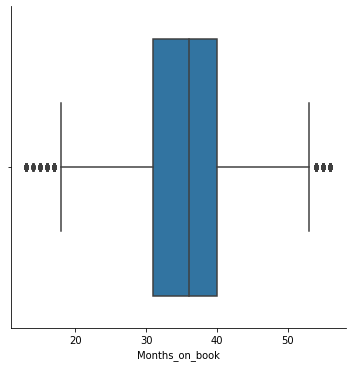

In [ ]:
sns.catplot(x='Months_on_book', kind= 'box', data=existingcustomerdf)

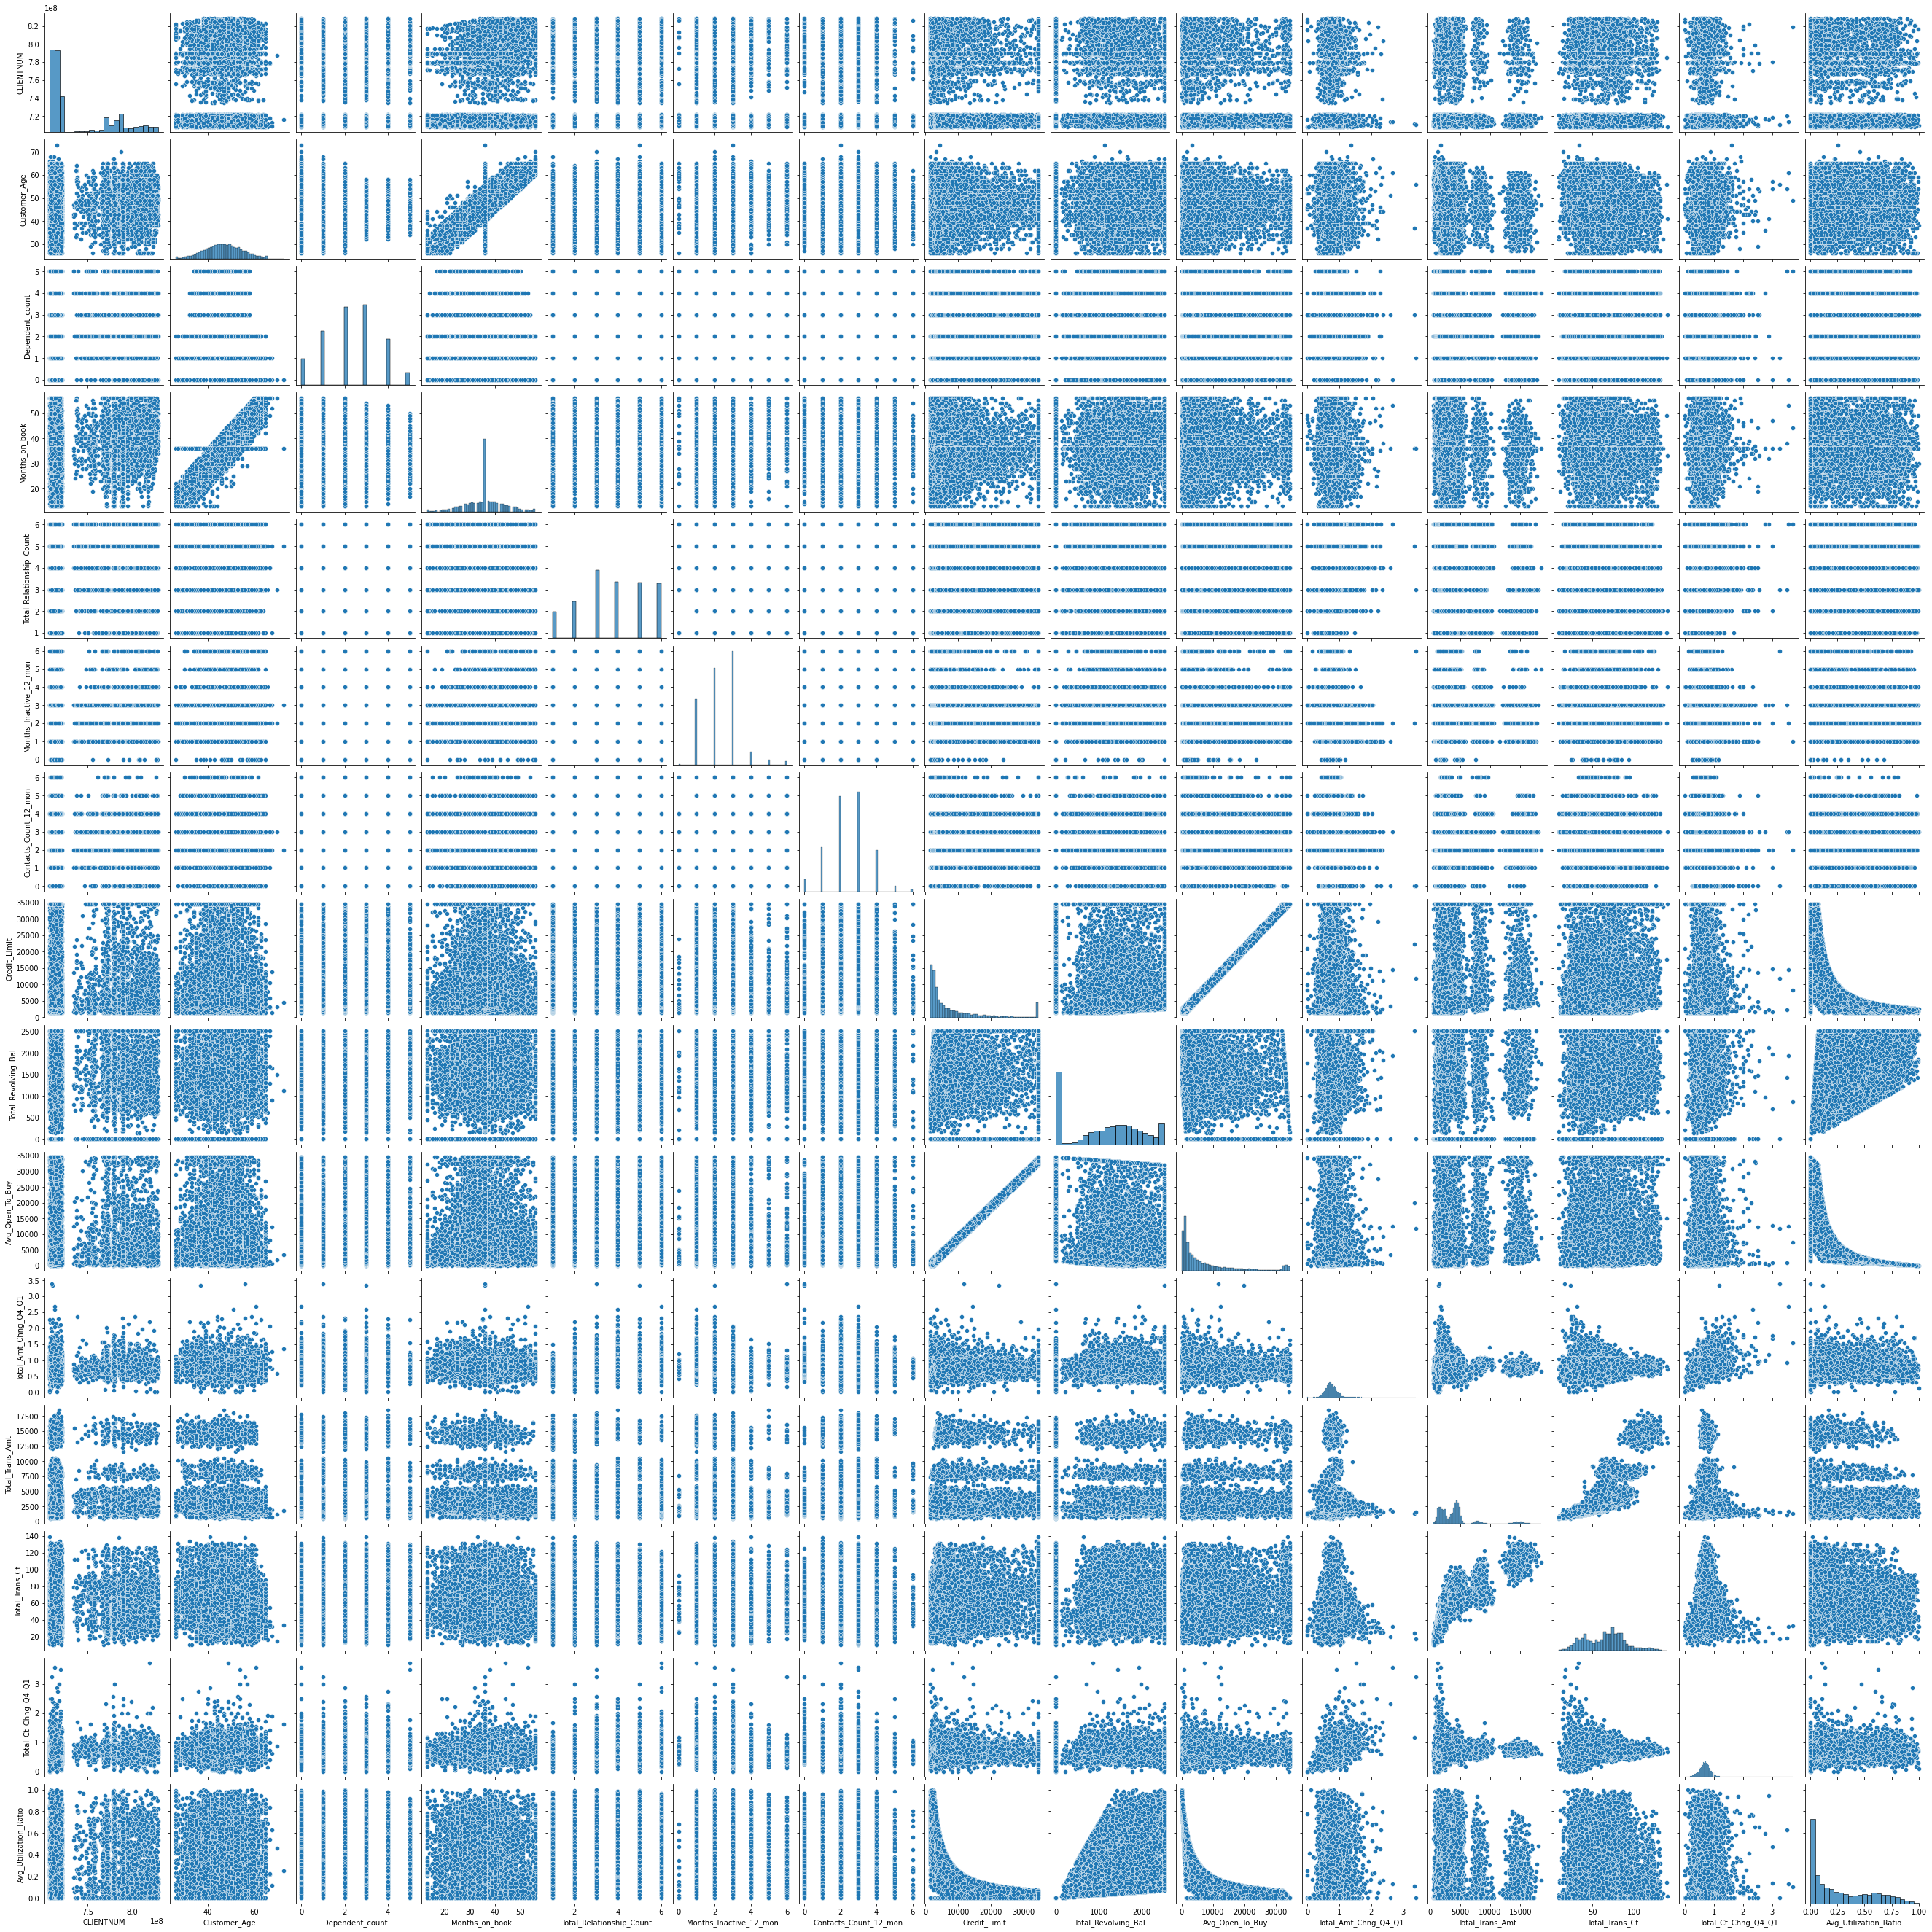

In [ ]:
sns.pairplot(df)

#Statistical Analysis

In [ ]:
df

CLIENTNUM  ...  Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0      768805383  ...                                           0.999910                                                                                 
1      818770008  ...                                           0.999940                                                                                 
2      713982108  ...                                           0.999980                                                                                 
3      769911858  ...                                           0.999870                                                                                 
4      709106358  ...                                           0.999980                                                                                 
...          ...  ...                                                ...                                                                                 
10122  772366833  ...                                           0.999810                                                                                 
10123  710638233  ...                                           0.004729                                                                                 
10124  716506083  ...                                           0.002118                                                                                 
10125  717406983  ...                                           0.003294                                                                                 
10126  714337233  ...                                           0.003377                                                                                 

[10127 rows x 23 columns]

In [ ]:
df['Attrition_Flag'].replace({"Existing Customer" : 0, 'Attrited Customer' : 1}, inplace=True) # 0 is a existing customer 1 is a cancelled customer
df['Gender'].replace({"M" : 0, 'F' : 1}, inplace=True) #Male 0 Female 1
df['Education_Level'].replace({"Unknown" : 0,'Uneducated' : 1, 'High School' : 2, 'College' : 3, 'Graduate' : 4, 'Post-Graduate' : 5, 'Doctorate' : 6}, inplace=True)
df['Marital_Status'].replace({"Unknown" : 0,'Married' : 1, 'Single' : 2, 'Divorced' : 3}, inplace=True)
df['Income_Category'].replace({"Unknown" : 0,'Less than $40K' : 1, '$40K - $60K' : 2, '$60K - $80K' : 3, '$80K - $120K' : 4, '$120K +' : 5}, inplace=True)
df['Card_Category'].replace({"Blue" : 0,'Gold' : 1, '$40K - $60K' : 2, 'Silver' : 3, 'Platinum' : 4}, inplace=True)


df

CLIENTNUM  Attrition_Flag  ...  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
0      768805383               0  ...                1.625                  0.061
1      818770008               0  ...                3.714                  0.105
2      713982108               0  ...                2.333                  0.000
3      769911858               0  ...                2.333                  0.760
4      709106358               0  ...                2.500                  0.000
...          ...             ...  ...                  ...                    ...
10122  772366833               0  ...                0.857                  0.462
10123  710638233               1  ...                0.683                  0.511
10124  716506083               1  ...                0.818                  0.000
10125  717406983               1  ...                0.722                  0.000
10126  714337233               1  ...                0.649                  0.189

[10127 rows x 21 columns]

##Is There a significant difference in mean avg utilization rates between the existing and canceled customers

Ho = There is not significant difference in the mean utilization rates between existing and cancelled customers
Ha = There is a significant difference in mean utilization rates between existing and cancelled customers

In [ ]:
newdf = df[['Attrition_Flag','Avg_Utilization_Ratio']]

CancelCustomer = newdf[newdf['Attrition_Flag'] == 1]
ExistingCustomer = newdf[newdf['Attrition_Flag'] == 0]


Attrition_Flag  Avg_Utilization_Ratio
0                   0                  0.061
1                   0                  0.105
2                   0                  0.000
3                   0                  0.760
4                   0                  0.000
...               ...                    ...
10116               0                  0.170
10117               0                  0.106
10120               0                  0.151
10121               0                  0.164
10122               0                  0.462

[8500 rows x 2 columns]

In [ ]:
print('Existing Customer mean AUR:', ExistingCustomer['Avg_Utilization_Ratio'].mean())
print('Canceled Customer mean AUR:', CancelCustomer['Avg_Utilization_Ratio'].mean())

Existing Customer mean AUR: 0.2964117647058822
Canceled Customer mean AUR: 0.16247510755992617


In [ ]:
mean_diff = ExistingCustomer['Avg_Utilization_Ratio'].mean() - CancelCustomer['Avg_Utilization_Ratio'].mean()
mean_diff

0.13393665714595604

In [ ]:
sm.stats.ztest(CancelCustomer["Avg_Utilization_Ratio"], ExistingCustomer["Avg_Utilization_Ratio"])

(-18.244911490565563, 2.2710443251162763e-74)

Our P value is less than .05 so we reject the null hypothesis.
Based on the estimated difference in sample means we can support that there is a significant difference between the population Average Utilization Rate between Canceled and Existing Customers

##Do Exisiting customers have a significantly higher mean age than Attrited customers?
H0 = There is no significant difference in mean age between Existing customers and cancelled customers

Ha = There is a significant difference in mean age between Existing customers and cancelled customers

In [ ]:
newdf = df[['Attrition_Flag','Customer_Age']]
CancelCustomer = newdf[newdf['Attrition_Flag'] == 1]
ExistingCustomer = newdf[newdf['Attrition_Flag'] == 0]

In [ ]:
print('Existing Customer mean Age:', ExistingCustomer['Customer_Age'].mean())
print('Canceled Customer mean Age:', CancelCustomer['Customer_Age'].mean())

Existing Customer mean Age: 46.26211764705882
Canceled Customer mean Age: 46.659496004917024


In [ ]:
mean_diff = ExistingCustomer['Customer_Age'].mean() - CancelCustomer['Customer_Age'].mean()
mean_diff

-0.3973783578582015

In [ ]:
sm.stats.ztest(CancelCustomer["Customer_Age"], ExistingCustomer["Customer_Age"])

(1.8319590211710879, 0.0669575261088948)

Our P Value is above .05 so we accept the Null Hypothesis. There is not sufficient evidence to say that there is a significant difference between the population age for cancelled and existing customers

##What is the average education level of Attrited Customers?

In [ ]:
newdf = df[['Attrition_Flag','Education_Level']]
CancelCustomer = newdf[newdf['Attrition_Flag'] == 1]
CancelCustomer['Education_Level'].mean()

2.636140135218193

Our canceled customers on average have some college education

##Do Existing Customers have a significantly higher mean income level than Canceled Customers?

H0 = There is no significant difference in mean income level between Existing and Canceled Customers
Ha = There is a significant difference in mean income level between Existing and Canceled Customers

In [ ]:
newdf = df[['Attrition_Flag','Income_Category']]
CancelCustomer = newdf[newdf['Attrition_Flag'] == 1]
ExistingCustomer = newdf[newdf['Attrition_Flag'] == 0]

In [ ]:
print('Existing Customer mean Age:', ExistingCustomer['Income_Category'].mean())
print('Canceled Customer mean Age:', CancelCustomer['Income_Category'].mean())

Existing Customer mean Age: 2.094470588235294
Canceled Customer mean Age: 2.0399508297480025


In [ ]:
sm.stats.ztest(CancelCustomer["Income_Category"], ExistingCustomer["Income_Category"])

(-1.3663110155315263, 0.17184136499325897)

Our P value is well above .05 so we accept the null hypothesis.  There is not sufficient evidence to suggest that there is a significant mean difference between Existing and Canceled Customers

##Logistic Regression

In [ ]:
model = sm.GLM.from_formula("Attrition_Flag ~Total_Trans_Amt + Total_Trans_Ct + Avg_Utilization_Ratio", family =sm.families.Binomial(), data=df)
result =model.fit()
result.summary()
#Logistical Regression model seeing the results where Attrition Flag is the dependent var
# And Transaction amount , Transaction Count, and Average Utilization Ratio are the independent 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                10127
Model:                            GLM   Df Residuals:                    10123
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3297.1
Date:                Wed, 28 Apr 2021   Deviance:                       6594.2
Time:                        22:29:49   Pearson chi2:                 7.46e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.7715      0.105     26.368      0.000       2.565       2.977
Total_Trans_Amt           0.0004    1.8e-05     21.062      0.000       0.000       0.000
Total_Trans_Ct           -0.0957      0.003    -33.884      0.000      -0.101      -0.090
Avg_Utilization_Ratio    -2.2274      0.136    -16.399      0.000      -2.494      -1.961
=========================================================================================
"""

There are relationships between all the variables and whether or not a customer canceled their card

In [ ]:
model2 = sm.GLM.from_formula("Attrition_Flag ~ Gender + Income_Category + Avg_Utilization_Ratio", family =sm.families.Binomial(), data=df)
result =model2.fit()
result.summary()
#Logistical Regression model seeing the results where Attrition Flag is the dependent var
# And customer age, gender, and education level are the independent 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                10127
Model:                            GLM   Df Residuals:                    10123
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4244.0
Date:                Wed, 28 Apr 2021   Deviance:                       8488.1
Time:                        23:07:32   Pearson chi2:                 1.09e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.5699      0.117    -13.434      0.000      -1.799      -1.341
Gender                    0.6159      0.096      6.422      0.000       0.428       0.804
Income_Category           0.0530      0.031      1.700      0.089      -0.008       0.114
Avg_Utilization_Ratio    -2.3601      0.126    -18.661      0.000      -2.608      -2.112
=========================================================================================
"""

\

/usr/local/lib/python3.7/dist-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'Dependent_count', 'Total_Ct_Chng_Q4_Q1', 'Marital_Status', 'CLIENTNUM', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Revolving_Bal', 'Credit_Limit', 'Months_on_book', 'Card_Category', 'Customer_Age', 'Total_Relationship_Count', 'Total_Trans_Ct', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Education_Level', 'Avg_Open_To_Buy' in data frame but not in summaries or values.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/sandbox/predict_functional.py:429: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  bz /= sigma[:, None]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and 

Text(0, 0.5, 'Attrition_Flag')

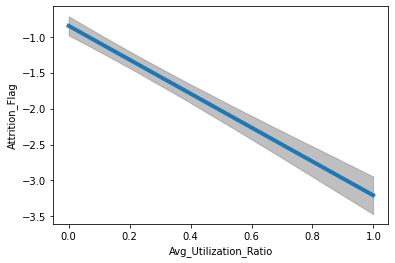

In [ ]:
from statsmodels.sandbox.predict_functional import predict_functional

values = {"Gender": 1, "Income_Category": 2}

pr, cb, fv = predict_functional(result, "Avg_Utilization_Ratio", values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.5)
ax.set_xlabel("Avg_Utilization_Ratio")
ax.set_ylabel("Attrition_Flag")

##MultiLevel Model

In [ ]:
import statsmodels.formula.api as smf

data = df

md = smf.mixedlm('Attrition_Flag ~ Avg_Utilization_Ratio', data, groups=df['Gender'])

mdf = md.fit()

print(mdf.summary())


              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  Attrition_Flag
No. Observations:    10127    Method:              REML          
No. Groups:          2        Scale:               0.1296        
Min. group size:     4769     Likelihood:          -4032.3559    
Max. group size:     5358     Converged:           Yes           
Mean group size:     5063.5                                      
-----------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.232    0.033   7.048 0.000  0.168  0.297
Avg_Utilization_Ratio -0.268    0.013 -19.939 0.000 -0.294 -0.242
Group Var              0.002    0.008                            



/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


#Machine Learning

In [ ]:
df

CLIENTNUM  ...  Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0      768805383  ...                                           0.999910                                                                                 
1      818770008  ...                                           0.999940                                                                                 
2      713982108  ...                                           0.999980                                                                                 
3      769911858  ...                                           0.999870                                                                                 
4      709106358  ...                                           0.999980                                                                                 
...          ...  ...                                                ...                                                                                 
10122  772366833  ...                                           0.999810                                                                                 
10123  710638233  ...                                           0.004729                                                                                 
10124  716506083  ...                                           0.002118                                                                                 
10125  717406983  ...                                           0.003294                                                                                 
10126  714337233  ...                                           0.003377                                                                                 

[10127 rows x 23 columns]

splitting data

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']]
y = df['Attrition_Flag']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler =MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

##KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 30)

In [ ]:
knn.fit(X_train_scaled, y_train)

In [ ]:
print('Train Accuracy', knn.score(X_train_scaled, y_train))
print('Test Accuracy', knn.score(X_test_scaled, y_test))


##Logistics Model

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train_scaled, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))


Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.90


##Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(X_train_scaled, y_train)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Accuracy of Linear SVC classifier on training set: 0.91
Accuracy of Linear SVC classifier on test set: 0.90


##RBF Kernel

In [ ]:
from sklearn import svm

clf = SVC(C=10, gamma=.6).fit(X_train_scaled, y_train)
print('RBF-kernel SVC training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

RBF-kernel SVC training set accuracy: 0.96
RBF-kernel SVC test set accuracy: 0.93


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train_scaled, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test_scaled) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'gamma': 1}
Grid best score (accuracy):  0.924292297564187


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 8,
                            random_state = 0).fit(X_train_scaled, y_train)

In [ ]:
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

print(df.columns)
print(clf.feature_importances_)

Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.92
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
[0.00591092 0.23248977 0.00497596 0.02443663 0.1395767  0.3460071
 0.07312184 0.00548494 0.02726862 0.         0.00044371 0.00073924
 0.00070413 0.         0.         0.00045569 0.11896121 0.01712506
 0.00229849]


Gender and Income Catagory seem to be the 2 significant features here

##Evaluating the RBF Kernel Model

In [ ]:
from sklearn.dummy import DummyClassifier

# Existing Customer (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train_scaled, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test_scaled)

y_dummy_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
dummy_majority.score(X_test_scaled, y_test)

0.8483412322274881

In [ ]:
from sklearn import metrics

y_pred = clf.predict(X_test_scaled)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred)) #Gets precentage of accurate results y_pred got when compared to y_test
print('Precision', metrics.precision_score(y_test, y_pred= y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.9265402843601895
Precision 0.89567068616624
Recall: 0.8005848463687151


In [ ]:
from sklearn import metrics

y_pred = clf.predict(X_test_scaled)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred)) #Gets precentage of accurate results y_pred got when compared to y_test
print('Precision', metrics.precision_score(y_test, y_pred= y_pred, average='micro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='micro'))

Accuracy: 0.9265402843601895
Precision 0.9265402843601895
Recall: 0.9265402843601895


Since the macro recall is significantly lower than the micro recall , I assume that means my predictor variable with less instances (Canceled Customers) get worse recall. But it is weid that the micro average gave me the exact same number for all metrics.

In [ ]:
from sklearn.model_selection import cross_val_score

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train_scaled, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test_scaled) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train_scaled, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test_scaled) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 1}
Grid best score (accuracy):  0.9165240289664253
Test set AUC:  0.9414620189323403
Grid best parameter (max. AUC):  {'gamma': 1}
Grid best score (AUC):  0.9490283603948223


Our high AUC indicates a steep curve a high true positive rate and low false positive rate at gamma 1

#Conclusion
I learned alot throughout this project. I learned more about what regression models are used for and how powerful exploratory analysis can be.  I also learned alot about machine learning, I could not visualize my ML models because the colab notebook would crash but I actually feel very comfortable making, using, evaluating, and interperating different ML models.  My personal favorite is the RBF kernel svc.

In the future I need to work on data processing more as I do not feel as comfortable doing that on my own as I did ML models and there was not that much processing / cleaning in this dataset.  Also, I should learn more about basic linear and regression models.